## Plot chains 

Notebook to plot chains run sampler object using chainconsumer. Here we look at including the nearest mean flux rescalings in the emulator training set.

In [1]:
import numpy as np
import emcee_sampler
from chainconsumer import ChainConsumer

In [2]:
sampler_single_full = emcee_sampler.EmceeSampler(read_chain_file=1)
sampler_single_neartau = emcee_sampler.EmceeSampler(read_chain_file=11)

 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (265000, 6)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (345000, 6)


In [3]:
chain_single_full,_=sampler_single_full.get_chain(cube=False)
chain_single_neartau,_=sampler_single_neartau.get_chain(cube=False)

In [4]:
## Function for prior
sigma=0.15
def prior(x):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-1)**2/(2*sigma**2))
    

In [5]:
## Generate prior data
x=np.linspace(0.5,1.5,500)
y=prior(x)

 /home/chris/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


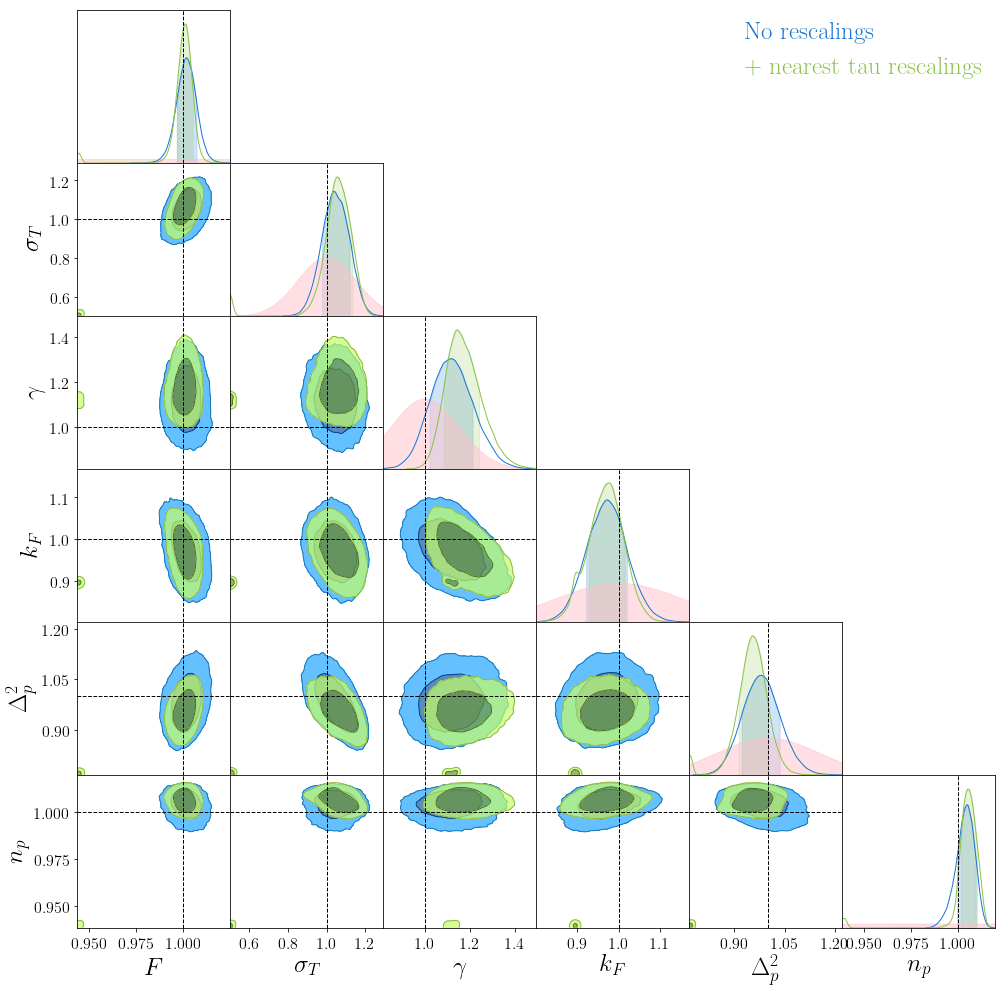

In [6]:
c=ChainConsumer()
c.add_chain(chain_single_full,parameters=sampler_single_full.paramstrings,name="No rescalings")
c.add_chain(chain_single_neartau,parameters=sampler_single_neartau.paramstrings,name="+ nearest tau rescalings")
c.configure(diagonal_tick_labels=False, tick_font_size=16, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=sampler_single_full.truth)
fig.axes[0].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[7].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[14].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[21].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[28].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[35].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.show()